### *Importing the essential libraries.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### *Loading the dataset into python enviornment.

In [53]:
data=pd.read_csv(r"C:\Users\HP\Downloads\car_age_price.csv")

In [54]:
data.head()                 #Displaying the dataset

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### *Checking the basic details of the dataset.

In [55]:
data.shape                     #It has two columns and 112 rows.

(112, 2)

In [56]:
data.columns                  #It has two columns year and price.

Index(['Year', 'Price'], dtype='object')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [58]:
data.describe()                  #Checking for descriptove statistics.

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [59]:
data.isnull().sum()              #Checking for null values.It has no null values.

Year     0
Price    0
dtype: int64

In [60]:
data.nunique()                  #Checking for the unique values.

Year      8
Price    35
dtype: int64

In [61]:
data['Year'].unique()          #Checking for the unique values in variable year.

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

### *Finding the correlation between variables 'Year' and 'Price'

<AxesSubplot:>

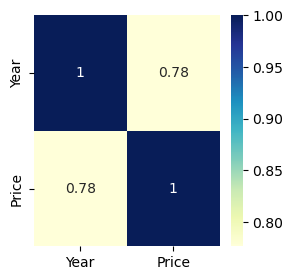

In [62]:
corrmatrix=data.corr()
plt.subplots(figsize=(3,3))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

INFERENCE:Variable 'year' and 'Price' are highly correlated.

### *Splitting the dataset into features and target.

In [63]:
y=data['Price']
x=data.drop('Price',axis=1)

In [64]:
print(x)                        #Features

     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns]


In [65]:
print(y)                      #Target.

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


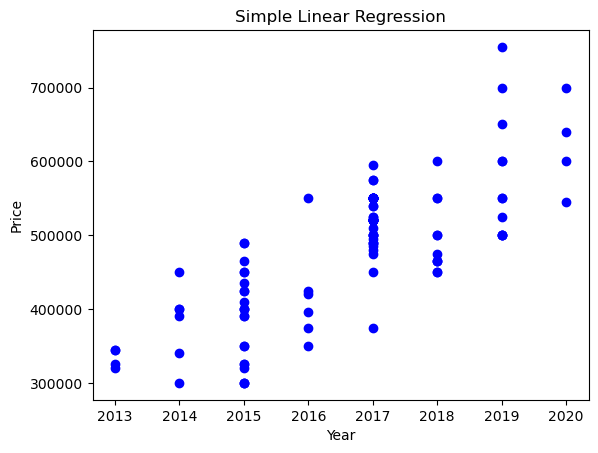

In [66]:
plt.scatter(x,y,color='blue')                    #Plotting the variable 'Price' w.r.t variable 'Year'.
plt.title('Simple Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### *Splitting the data into Training and Testing data.

In [67]:
from sklearn.model_selection import train_test_split           #Importing the library for splitting data.

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)    #Splitting the data.

In [69]:
from sklearn.linear_model import LinearRegression             #Importing library for model creation.

In [70]:
lr1=LinearRegression()

In [71]:
model1=lr1.fit(x_train,y_train)                               #Creating the model.
print(model1.coef_)

[47608.56780808]


INFERENCE:The model1.coef_ is a quantity that shows the relation between Price and Year.

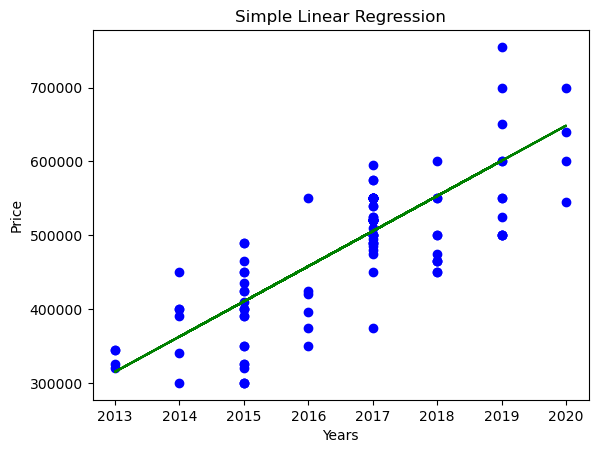

In [72]:
plt.scatter(x,y,color='blue')
plt.plot(x,model1.predict(x),color='green')
plt.title('Simple Linear Regression')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

INFERENCE:The green line represent the best fit line.

In [73]:
y_pred=model1.predict(x_test)                   #Predicting the values for x_test using model.

In [74]:
print(x_test)
print('predicted price',y_pred)

     Year
40   2019
65   2017
4    2018
47   2018
42   2018
69   2015
26   2017
11   2018
10   2019
44   2019
73   2013
55   2017
68   2015
97   2020
0    2018
18   2019
53   2013
80   2015
103  2017
91   2017
36   2017
12   2017
31   2017
predicted price [600775.91252081 505558.77690466 553167.34471273 553167.34471273
 553167.34471273 410341.6412885  505558.77690466 553167.34471273
 600775.91252081 600775.91252081 315124.50567235 505558.77690466
 410341.6412885  648384.48032889 553167.34471273 600775.91252081
 315124.50567235 410341.6412885  505558.77690466 505558.77690466
 505558.77690466 505558.77690466 505558.77690466]


### *Evaluating the model

In [75]:
from sklearn.metrics import mean_squared_error,r2_score                   #importing the library.

In [76]:
print("Mean Squared Error is : ", mean_squared_error(y_test,y_pred))      
print("R squared value is : ",r2_score(y_test,y_pred))

Mean Squared Error is :  4326906256.829671
R squared value is :  0.36759313425902185


### Predicting the possible price for a 2022 model second-hand grand i10.

In [77]:
year = [2022]
year = pd.DataFrame(year, columns=['Year'])
y_pred = model1.predict(year)
y_pred

array([743601.61594504])

INFERENCE:The possible price of a 2022 model second-hand grand i10 is 743601.61

## Lasso Regression Model

In [78]:
from sklearn.linear_model import Lasso              #Importing the library.

In [79]:
lasso=Lasso(alpha=1.0)

In [80]:
model2=lasso.fit(x_train,y_train)                  #Creating a model.

In [81]:
y_pred2=model2.predict(x_test)                     #Predicting the values for x_test using the model we created.

In [82]:
y_pred2

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

### *Evaluating the model

In [83]:
mean_squared_error = np.mean((y_pred2 - y_test)**2)
print('Mean squared error ', mean_squared_error)

Mean squared error  4326859771.015669


In [84]:
print('R Squared value is:',r2_score(y_test,y_pred2))

R Squared value is: 0.3675999284778446


In [85]:
lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

  Columns  Coefficient Estimate
0    Year            47608.1556


### Predicting the possible price for a 2022 model second-hand grand i10.

In [86]:
year = [2022]
year = pd.DataFrame(year, columns=['Year'])
y_pred2 = model2.predict(year)
y_pred2

array([743599.37427144])

INFERENCE: The possible price of a 2022 model second-hand grand i10 is 743599.37

The MSE of Linear Regression model is  4326906256.829671.
Whereas,the MSE of Lasso Regression model is  4326859771.015669.
The difference between them is very little.
The R Squared value of Linear and Lasso regression model are  0.36759313425902185 and 0.3675999284778446 respectievely.
Here also the difference between them is very little.

INFERENCE:By observing the MSE and R Squared error we can see that Lasso Regression model is performing better than Linear Regression model.